# Dirk Hartog
# DATA 620: Assignment 1 "hello graph world"

In this assignment, you’re asked to create the nodes and edges for a basic graph, such as the Krackhardt kite shown below. (You’re welcome to substitute data of your own choosing).

You may use a package of your own choosing, such as iGraph or NetworkX, or...? 

Your code should be delivered in an IPython notebook, and placed into GitHub. 

In your assignment link, please provide a link to your GitHub repository.

In [4]:
# install packages 
## Uncomment to install in your virtual enviornment

!pip install networkx
!pip install matplotlib
!pip install iGraph

  Using cached igraph-0.11.8-cp39-abi3-macosx_10_9_x86_64.whl.metadata (3.8 kB)
  Using cached texttable-1.7.0-py2.py3-none-any.whl.metadata (9.8 kB)
Using cached igraph-0.11.8-cp39-abi3-macosx_10_9_x86_64.whl (1.9 MB)
Using cached texttable-1.7.0-py2.py3-none-any.whl (10 kB)


In [6]:
# import packages

import networkx as nt
import matplotlib.pyplot as plt
import igraph as ig
import matplotlib.lines as mlines

## Krackhardt Kite graph using Networkx

To build a Krackhardt Kite the krackhardt_kite_graph function can be used from the NetworkX package.

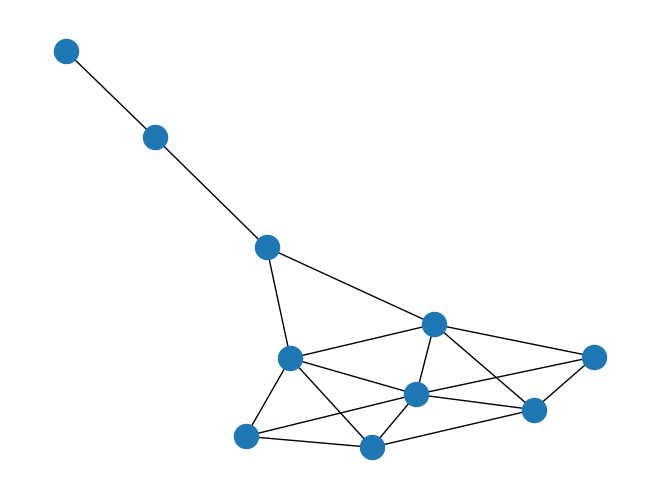

In [12]:
# Create and draw a Krackhardt Kite Graph

kk1 = nt.krackhardt_kite_graph()

nt.draw(kk1)

## Creating a Krackhardt graph with iGraph

Tutorial can be found at https://python.igraph.org/en/stable/tutorial.html#layout-algorithms

In order to create a Krackhardt Kite Graph with iGraph we need to define the edges of the graph. We can extract the edges from the graph created using the NetworkX package and use them as inputs to create a graph using the .Graph function in iGraph. Using iGraph the Krasckhardt Kite graph was created and attritbutes of the nodes were set. The goal was to build the graph to mimic a network of friends and their relationships with each other. 

In [22]:
# Node data taken from the attriutes in the graph created using networkx

# Create a graph object 
g = ig.Graph([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 4), (1, 6), (2, 3), (2, 5), (3, 4), 
              (3, 5), (3, 6), (4, 6), (5, 6), (5, 7), (6, 7), (7, 8), (8, 9)])

# Set attributes of names and genders 
g.vs["name"] = ["Monique", "Lauren", "Ale", "Dirk", "John", 
                "Danielle", "Richard", "Peter", "Sari", "Justin"]

g.vs["gender"] = ["female", "female", "male", "male", "male", 
                  "female", "male", "male", "female", "male"]

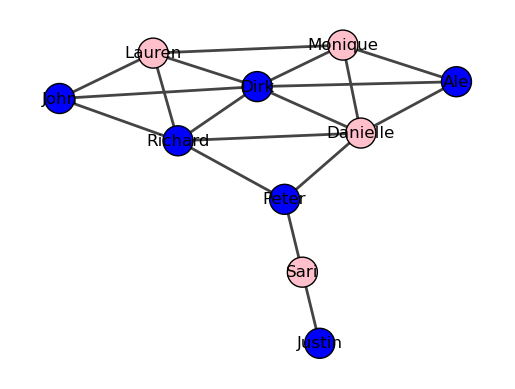

In [24]:
# Using matplotlib.subplots() to create a figure and plot the kite graph

# Define layout algorithm 
## 'kk' == Kamada-Kawai force-directed algorithm
layout = g.layout("kk")

# Create a subplot object 
fig, ax = plt.subplots()

# Set node labels to names
g.vs["label"] = g.vs["name"]

# Set node colors to gender
color_dict = {"male": "blue", "female": "pink"}
g.vs["color"] = [color_dict[gender] for gender in g.vs["gender"]]

# Plot 
ig.plot(g, layout = layout, target=ax)

plt.show()

A second graph was constructed with iGraph with the aim of exploring adding more style to the graph to inlcude: 

- Rotating the graph for easier viewing 
- Chanigng the shape of the node
- Color the nodes by the categorical variable 

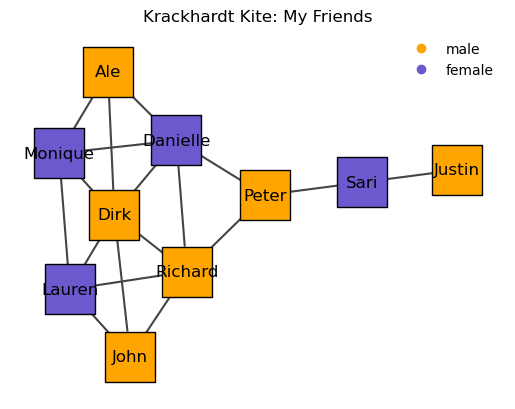

<Figure size 1000x1600 with 0 Axes>

In [26]:
# Create new plotting canvas
fig, ax = plt.subplots()

plt.figure(figsize=(10,16))

# Create a layout object
layout = g.layout("kk")

# Set layout rotation attribute 
layout.rotate(90)

# Create a dictionary to specify colors based on gender
color_dict = {"male": "#ffa500", "female": "#6a5acd"}

# Create style dictoinary 
visual_style = {}
visual_style["vertex_size"] = 50
visual_style["vertex_shape"] = "rectangle"
visual_style["vertex_label"] = g.vs["name"]
visual_style["vertex_color"] = [color_dict[gender] for gender in g.vs["gender"]]
visual_style["edge_width"] = 1.5
visual_style["layout"] = layout

# Plot the kite pointing the object to the axes in the matplotlib object
ig.plot(g, target=ax, **visual_style)

# Manually create a legend using matplotlib
legend_elements = []
for key, value in color_dict.items():
    legend_elements.append(mlines.Line2D([], [], color=value, marker='o', 
                                         linestyle='None', label=key))

# Create legend 
ax.legend(handles=legend_elements, loc='upper right', frameon = False)

# Set a title 
ax.set_title("Krackhardt Kite: My Friends")

plt.show()